# INSTALLING THE DATASET (dair-AI,emotion) from huggingFace

# Importing Important librares

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Load and Explore the Emotion Dataset

In [2]:
from datasets import load_dataset

emotion_dataset = load_dataset("dair-ai/emotion", "split")
df = emotion_dataset['train'].to_pandas()

df.head()

C:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\devos\.cache\huggingface\hub\datasets--dair-ai--emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microso

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


## SAVE DATA TO CSV FILE

In [4]:
df.to_csv("mood_data.csv", index=False)

# EDA + Preprocessing + Visualization

In [5]:
df.shape

(16000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [18]:
label_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

df['label'] = df['label'].map(label_map)

In [19]:
print(df['label'].unique())

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


In [20]:
custom_order = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
label_counts = df['label'].value_counts()

for label in custom_order:
    print(f"{label}: {label_counts.get(label, 0)}")

sadness: 4666
joy: 5362
love: 1304
anger: 2159
fear: 1937
surprise: 572


# Visualization of Dataset 

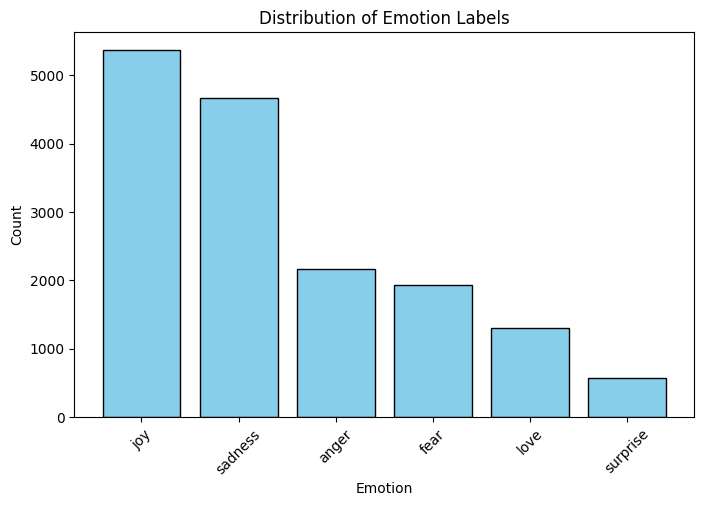

In [32]:
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')

# Labels and title
plt.title("Distribution of Emotion Labels")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Before Preprocessing of dataset 

In [34]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print(df['text_length'].describe())

count    16000.000000
mean        19.166313
std         10.986905
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: text_length, dtype: float64


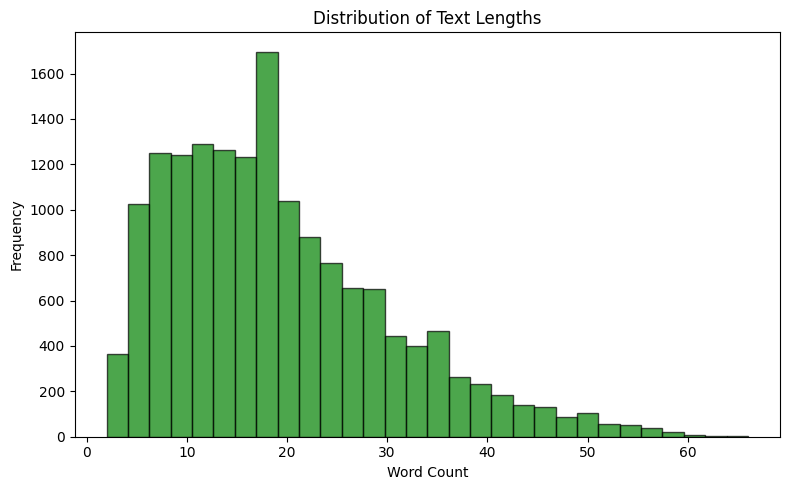

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df['text_length'], bins=30, color='green', edgecolor='black', alpha=0.7)

plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [37]:
import re

def basic_clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(basic_clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy


In [41]:
df

,text,label,text_length,clean_text
0,i didnt feel humiliated,sadness,4,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,21,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,10,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,18,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,4,i am feeling grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,24,i just had a very brief time in the beanbag an...
15996,i am now turning and i feel pathetic that i am...,sadness,20,i am now turning and i feel pathetic that i am...
15997,i feel strong and good overall,joy,6,i feel strong and good overall
15998,i feel like this was such a rude comment and i...,anger,14,i feel like this was such a rude comment and i...


In [38]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/41.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/41.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/41.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 125.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.0/1.5 MB 960.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 930.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 717.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 981.9 kB/s eta 0:00:0

In [43]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text_with_stopwords(text):
    text = basic_clean_text(text)
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

df['clean_text_stopwords'] = df['text'].apply(clean_text_with_stopwords)
df[['text', 'clean_text']].head(10)


,text,clean_text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,i have been with petronas for years i feel tha...
9,i feel romantic too,i feel romantic too


In [44]:
df

,text,label,text_length,clean_text,clean_text_stopwords
0,i didnt feel humiliated,sadness,4,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,21,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,10,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,18,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,4,i am feeling grouchy,feeling grouchy
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,24,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,20,i am now turning and i feel pathetic that i am...,turning feel pathetic still waiting tables sub...
15997,i feel strong and good overall,joy,6,i feel strong and good overall,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,14,i feel like this was such a rude comment and i...,feel like rude comment im glad


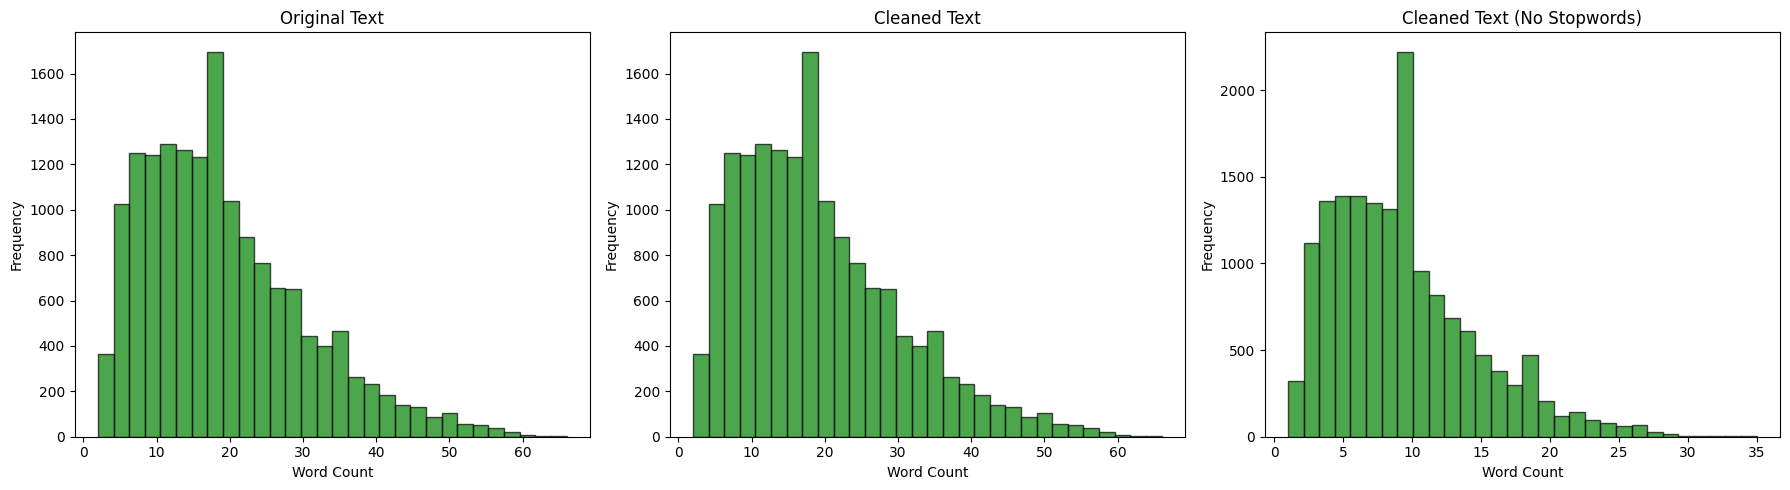

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot : Original Text
axes[0].hist(df['text'].str.split().apply(len), bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title("Original Text")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")

# Plot 2: Cleaned text
axes[1].hist(df['clean_text'].str.split().apply(len), bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title("Cleaned Text")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")

# Plot 3: Cleaned text without stopwords
axes[2].hist(df['clean_text_stopwords'].str.split().apply(len), bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title("Cleaned Text (No Stopwords)")
axes[2].set_xlabel("Word Count")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# So we find that the hugging face data set for sentiment analyzer is already  cleaned and preprocessed after removing stopword from datset

 # Encoding the Labels
 ### Encode emotion labels (e.g., 'joy', 'sadness') into numeric form
### Required because ML models only work with numerical target values

# Build our Sentiment Classifier

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


# Vectorizing  the Cleaned Text using TF-IDF

In [ ]:
 ''' 
 Step 1 : Create a TF-IDF vectorizer to extract top 5000 important words from the text
 Step 2 : Convert cleaned text into numeric feature vectors (X) for model input
 Step 3 : Store encoded emotion labels (y) as target output for training
 5000 is good for most small to medium-sized NLP tasks. '''

In [54]:
df

,text,label,text_length,clean_text,clean_text_stopwords,label_encoded
0,i didnt feel humiliated,sadness,4,i didnt feel humiliated,didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,21,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,10,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,18,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,4,i am feeling grouchy,feeling grouchy,0
...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,24,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten,4
15996,i am now turning and i feel pathetic that i am...,sadness,20,i am now turning and i feel pathetic that i am...,turning feel pathetic still waiting tables sub...,4
15997,i feel strong and good overall,joy,6,i feel strong and good overall,feel strong good overall,2
15998,i feel like this was such a rude comment and i...,anger,14,i feel like this was such a rude comment and i...,feel like rude comment im glad,0


# Step 1 :

In [59]:
# Now Importing  validation and test datasets

val_df   = emotion_dataset['validation'].to_pandas()
test_df  = emotion_dataset['test'].to_pandas()

print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Validation shape: (2000, 2)
Test shape: (2000, 2)


In [60]:
val_df

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


In [61]:
test_df

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [63]:
val_df['clean_text'] = val_df['text'].apply(clean_text_with_stopwords)
test_df['clean_text'] = test_df['text'].apply(clean_text_with_stopwords)

In [67]:
# Print first 10 rows of validation set
print("Validation Set (Before & After Cleaning):")
val_df[['text', 'clean_text']].head(10)

Validation Set (Before & After Cleaning):


,text,clean_text
0,im feeling quite sad and sorry for myself but ...,im feeling quite sad sorry ill snap soon
1,i feel like i am still looking at a blank canv...,feel like still looking blank canvas blank pie...
2,i feel like a faithful servant,feel like faithful servant
3,i am just feeling cranky and blue,feeling cranky blue
4,i can have for a treat or if i am feeling festive,treat feeling festive
5,i start to feel more appreciative of what god ...,start feel appreciative god done
6,i am feeling more confident that we will be ab...,feeling confident able take care baby
7,i feel incredibly lucky just to be able to tal...,feel incredibly lucky able talk
8,i feel less keen about the army every day,feel less keen army every day
9,i feel dirty and ashamed for saying that,feel dirty ashamed saying


In [68]:
# Print first 10 rows of test set
print("\n Test Set (Before & After Cleaning):")
test_df[['text', 'clean_text']].head(10)


 Test Set (Before & After Cleaning):


,text,clean_text
0,im feeling rather rotten so im not very ambiti...,im feeling rather rotten im ambitious right
1,im updating my blog because i feel shitty,im updating blog feel shitty
2,i never make her separate from me because i do...,never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,left bouquet red yellow tulips arm feeling sli...
4,i was feeling a little vain when i did this one,feeling little vain one
5,i cant walk into a shop anywhere where i do no...,cant walk shop anywhere feel uncomfortable
6,i felt anger when at the end of a telephone call,felt anger end telephone call
7,i explain why i clung to a relationship with a...,explain clung relationship boy many ways immat...
8,i like to have the same breathless feeling as ...,like breathless feeling reader eager see happe...
9,i jest i feel grumpy tired and pre menstrual w...,jest feel grumpy tired pre menstrual probably ...


In [75]:
val_df

,text,label,clean_text
0,im feeling quite sad and sorry for myself but ...,0,im feeling quite sad sorry ill snap soon
1,i feel like i am still looking at a blank canv...,0,feel like still looking blank canvas blank pie...
2,i feel like a faithful servant,2,feel like faithful servant
3,i am just feeling cranky and blue,3,feeling cranky blue
4,i can have for a treat or if i am feeling festive,1,treat feeling festive
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,0,im ssa examination tomorrow morning im quite w...
1996,i constantly worry about their fight against n...,1,constantly worry fight nature push limits inne...
1997,i feel its important to share this info for th...,1,feel important share info experience thing
1998,i truly feel that if you are passionate enough...,1,truly feel passionate enough something stay tr...


In [76]:
test_df

,text,label,clean_text
0,im feeling rather rotten so im not very ambiti...,0,im feeling rather rotten im ambitious right
1,im updating my blog because i feel shitty,0,im updating blog feel shitty
2,i never make her separate from me because i do...,0,never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,1,left bouquet red yellow tulips arm feeling sli...
4,i was feeling a little vain when i did this one,0,feeling little vain one
...,...,...,...
1995,i just keep feeling like someone is being unki...,3,keep feeling like someone unkind wrong think g...
1996,im feeling a little cranky negative after this...,3,im feeling little cranky negative doctors appo...
1997,i feel that i am useful to my people and that ...,1,feel useful people gives great feeling achieve...
1998,im feeling more comfortable with derby i feel ...,1,im feeling comfortable derby feel though start...


# Step - 3 

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(df['clean_text_stopwords'])  # Use clean column
y_train  = df['label_encoded']

X_val = tfidf.transform(val_df['clean_text'])              # Validation
y_val = val_df['label']

X_test = tfidf.transform(test_df['clean_text'])            # Test
y_test = test_df['label']

In [73]:
df

,text,label,text_length,clean_text,clean_text_stopwords,label_encoded
0,i didnt feel humiliated,sadness,4,i didnt feel humiliated,didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,21,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,10,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,18,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,4,i am feeling grouchy,feeling grouchy,0
...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,24,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten,4
15996,i am now turning and i feel pathetic that i am...,sadness,20,i am now turning and i feel pathetic that i am...,turning feel pathetic still waiting tables sub...,4
15997,i feel strong and good overall,joy,6,i feel strong and good overall,feel strong good overall,2
15998,i feel like this was such a rude comment and i...,anger,14,i feel like this was such a rude comment and i...,feel like rude comment im glad,0


# Step 3 : Training  Logistic Regression Model

# What is it ? and why we have used it ?
Logistic Regression is a machine learning algorithm used to classify data into categories by estimating the probability of each class. It’s commonly used for tasks like emotion or sentiment prediction. We used Logistic Regression because it's fast, easy to implement, and works well for text classification problems like emotion detection using TF-IDF features.

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

# Step 5: Evaluate the Model on Validation Set

In [83]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on validation data
y_val_prediction = model.predict(X_val)

# Evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_val_prediction))
print("\nClassification Report:\n", classification_report(y_val, y_val_prediction, target_names=label_map.values()))


Validation Accuracy: 0.0555

Classification Report:
               precision    recall  f1-score   support

     sadness       0.05      0.03      0.04       550
         joy       0.03      0.01      0.02       704
        love       0.01      0.04      0.02       178
       anger       0.01      0.01      0.01       275
        fear       0.01      0.03      0.02       212
    surprise       0.72      0.90      0.80        81

    accuracy                           0.06      2000
   macro avg       0.14      0.17      0.15      2000
weighted avg       0.06      0.06      0.05      2000



# Step 6  : Test the Model

In [90]:
y_test_predict = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.0535

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.08      0.04      0.06       581
           1       0.02      0.01      0.01       695
           2       0.02      0.06      0.02       159
           3       0.01      0.01      0.01       275
           4       0.02      0.04      0.02       224
           5       0.60      0.88      0.72        66

    accuracy                           0.05      2000
   macro avg       0.12      0.17      0.14      2000
weighted avg       0.06      0.05      0.05      2000



# Step : 7  Through User Input 

In [94]:
def predict_mood(text):
    # Preprocess the text
    clean = clean_text_with_stopwords(text)
    vector = tfidf.transform([clean])
    pred = model.predict(vector)[0]
    mood = le.inverse_transform([pred])[0]
    return mood

print(predict_mood("I'm feeling excited and full of energy today!"))


joy


# Step : 8  Save the Model 

In [96]:
import pickle

# Save multiple objects in one file
with open("sentiment_components.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "tfidf": tfidf,
        "label_encoder": le
    }, f)
